In [17]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [18]:
df = pd.read_csv("C:/Users/dbda.STUDENTSDC/Documents/Advanced Analytics using Statistics/MS_Dhoni_ODI_record.csv")

In [19]:
df.head()

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,odi_number
0,0,0,1,0,0,0,v Bangladesh,Chattogram,23/12/2004,ODI # 2199
1,12,12,11,109.09,2,0,v Bangladesh,Dhaka,26/12/2004,ODI # 2201
2,7*,7,2,350,0,1,v Bangladesh,Dhaka,27/12/2004,ODI # 2202
3,3,3,7,42.85,0,0,v Pakistan,Kochi,02/04/2005,ODI # 2235
4,148,148,123,120.32,15,4,v Pakistan,Visakhapatnam,05/04/2005,ODI # 2236


In [20]:
# Data Cleaning
df['opposition'] = df['opposition'].str.replace('v ','',regex = False)
print(df['opposition'])

0       Bangladesh
1       Bangladesh
2       Bangladesh
3         Pakistan
4         Pakistan
          ...     
345    West Indies
346        England
347     Bangladesh
348      Sri Lanka
349    New Zealand
Name: opposition, Length: 350, dtype: object


In [30]:
df
# df.drop(columns='odi_number',inplace=True)

,score,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date
0,0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004
1,12,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004
2,7*,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004
3,3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005
4,148,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005
...,...,...,...,...,...,...,...,...,...
345,56*,56,61,91.8,3,2,West Indies,Manchester,27/06/2019
346,42*,42,31,135.48,4,1,England,Birmingham,30/06/2019
347,35,35,33,106.06,4,0,Bangladesh,Birmingham,02/07/2019
348,DNB,-,-,-,-,-,Sri Lanka,Leeds,06/07/2019


In [33]:
# Create 'not_out' columns
df['score']=df['score'].apply(str)
df['not_out'] = np.where(df['score'].str.endswith('*'),1,0)

In [38]:
# Filter out innings where Dhoni did not bat/ Team did not bat
df_new = df.loc[((df['score']!='DNB') & (df['score']!='TDNB')),'runs_scored':]
df_new

,runs_scored,balls_faced,strike_rate,fours,sixes,opposition,ground,date,not_out
0,0,1,0,0,0,Bangladesh,Chattogram,23/12/2004,0
1,12,11,109.09,2,0,Bangladesh,Dhaka,26/12/2004,0
2,7,2,350,0,1,Bangladesh,Dhaka,27/12/2004,1
3,3,7,42.85,0,0,Pakistan,Kochi,02/04/2005,0
4,148,123,120.32,15,4,Pakistan,Visakhapatnam,05/04/2005,0
...,...,...,...,...,...,...,...,...,...
344,28,52,53.84,3,0,Afghanistan,Southampton,22/06/2019,0
345,56,61,91.8,3,2,West Indies,Manchester,27/06/2019,1
346,42,31,135.48,4,1,England,Birmingham,30/06/2019,1
347,35,33,106.06,4,0,Bangladesh,Birmingham,02/07/2019,0


In [43]:
#Fix Data types
df_new['runs_scored'] = df_new['runs_scored'].astype(int)
df_new['balls_faced'] = df_new['balls_faced'].astype(int)
df_new['strike_rate'] = df_new['strike_rate'].astype(float)
df_new['fours'] = df_new['fours'].astype(int)
df_new['sixes'] = df_new['sixes'].astype(int)
df_new['date'] = df_new['date'].astype('datetime64[ns]')


In [46]:
# Career stats
first_match_date = df_new['date'].dt.date.min().strftime('%B%d, %Y')
print('First Match Date: ', first_match_date)
last_match_date = df_new['date'].dt.date.max().strftime('%B%d, %Y')
print('Last Match Date: ', last_match_date)



First Match Date:  December23, 2004
Last Match Date:  December01, 2019


In [86]:
#Career Stats
number_of_matches = df.shape[0] # shape[0] = row count, shape[1] = col count
print('Number of matches Played: ',number_of_matches)
number_of_inns = df_new.shape[0]
print('Number of innings Played: ',number_of_inns)
not_outs = df_new['not_out'].sum()
print('Not outs: ' ,not_outs)
runs_scored = df_new['runs_scored'].sum()
print('Runs Scored in Career: ',runs_scored)
balls_faced =  df_new['balls_faced'].sum()
print('Balls faced in career: ',balls_faced)
career_sr = (runs_scored / balls_faced)*100
print('Career Strike rate:{:.2f}'.format(career_sr))
career_avg = (runs_scored/(number_of_inns-not_outs))
print('Career Average:{:.2f}'.format(career_avg))
hundreds = (df_new['runs_scored']>= 100).sum()
print('Number of 100s :',hundreds)
fifties = ((df_new['runs_scored']>= 50) & (df_new['runs_scored']< 100)).sum()
print('Number of 50s :',fifties)
fours = df_new['fours'].sum()
print('Number of Fours', fours)
Sixes = df_new['sixes'].sum()
print('Number of Sixes', Sixes)

Number of matches Played:  350
Number of innings Played:  297
Not outs:  84
Runs Scored in Career:  10773
Balls faced in career:  12303
Career Strike rate:87.56
Career Average:50.58
Number of 100s : 10
Number of 50s : 73
Number of Fours 826
Number of Sixes 229


In [88]:
# Matches agains each different oppositions
opposition_counts = df['opposition'].value_counts()
print('No. of Opposition: ',opposition_counts)

No. of Opposition:  opposition
Sri Lanka       67
Australia       55
England         48
West Indies     39
South Africa    37
Pakistan        36
New Zealand     28
Bangladesh      21
Zimbabwe         6
Africa XI        3
Hong Kong        2
Afghanistan      2
Ireland          2
Scotland         1
Bermuda          1
Netherlands      1
U.A.E.           1
Name: count, dtype: int64


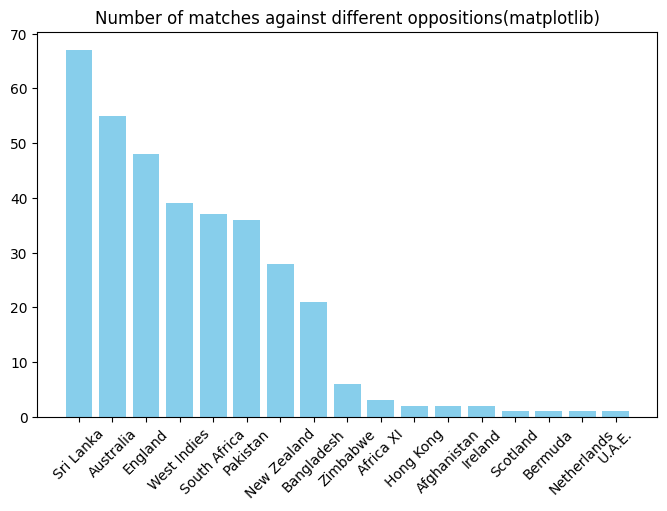

In [89]:
# Matplolib bar plot
plt.figure(figsize=(8,5))
plt.bar(opposition_counts.index, opposition_counts.values, color='skyblue')
plt.title('Number of matches against different oppositions(matplotlib)')
plt.xticks(rotation = 45)
plt.show()

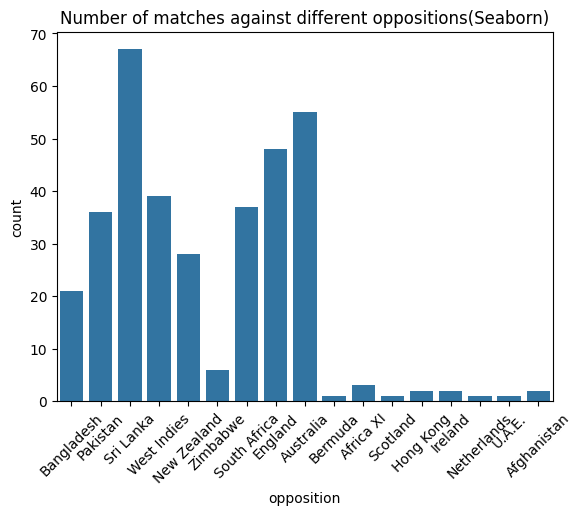

In [91]:
# Seaborn version
sns.countplot(x='opposition',data =df)
plt.title('Number of matches against different oppositions(Seaborn)')
plt.xticks(rotation =45)
plt.show()

<BarContainer object of 15 artists>

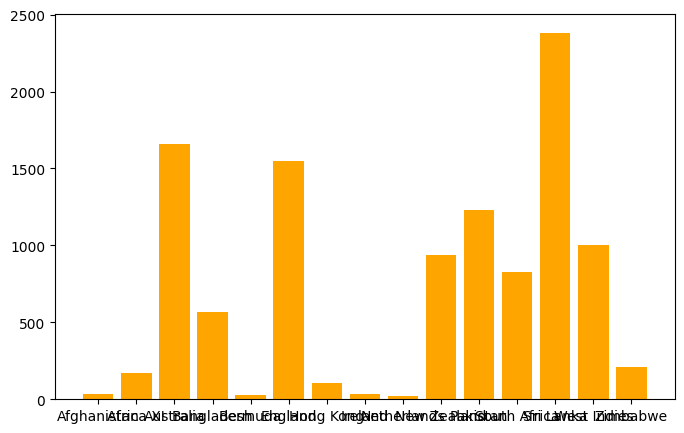

In [93]:
# Runs scored against each team
runs_scored_by_opposition = df_new.groupby('opposition')['runs_scored'].sum().reset_index()
# Matplotlib
plt.figure(figsize= (8,5))
plt.bar(runs_scored_by_opposition['opposition'],runs_scored_by_opposition['runs_scored'],color='orange')
plt.title('Runs scored against different